This file is created for verifying models performance and loading artificial intelligence model quickly.

In [1]:
import fastai as fst
import pickle
import torch
from fastai.vision.all import *
from ipywidgets import widgets
from io import BytesIO

#Making our model compatible with android platforms
import torch 
import torchvision
from torch.utils.mobile_optimizer import optimize_for_mobile

Verification of version of pytorch

In [3]:
print(torch.__version__)

2.2.1+cu121


In [2]:
with open(file = 'doctor.pickle', mode = 'rb') as file:
    model = pickle.load(file = file)
model

In [3]:
upload = widgets.FileUpload()
upload

FileUpload(value=(), description='Upload')

Prediction Element : Melanoma
Probability rate : 0.9999964237213135


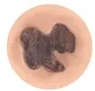

In [6]:
img = PILImage.create(BytesIO(upload.value[-1].content))
pred, pred_id, probs = model.predict(item = img)
print(f"Prediction Element : {pred}")
print(f"Probability rate : {probs[pred_id]}")
img

This jupyter notebook is created for converting existing medical diagnosis model from pickle format to tensorflow lite model.

In [6]:
final_model = nn.Sequential(model.model,nn.Softmax()).to('cpu')

final_model.eval()
example = torch.rand(1, 3, 224, 224).cpu()
traced_script_module = torch.jit.trace(final_model, example)
traced_script_module_optimized = optimize_for_mobile(traced_script_module)
traced_script_module_optimized._save_for_lite_interpreter("./model_saved.ptl")

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\module.py:1520: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return forward_call(*args, **kwargs)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [1]:
import requests 
 
resp = requests.post("https://a0c0-84-54-78-213.ngrok-free.app", files = {'file' : open('img.jpg', 'rb')})

print(resp.json())


{'NotMelanoma': 0.9657739400863647}
